<a href="https://colab.research.google.com/github/gaddyh/WhistleNet/blob/main/WhistleNet123.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from IPython.display import Audio

!pip install tensorflow-io
import tensorflow_io as tfio

P = 48000
Q = 44100

isExist = os.path.exists('AudioWhistleData')
if not isExist:
  !git clone https://github.com/gaddyh/AudioWhistleData
audio_root_dir = "AudioWhistleData/Audio Prep Files for Colab"

SAMPLE_RATE = 44100

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
AUDIO_FILE = audio_root_dir + '/me/fsharp.wav'

audio = tfio.audio.AudioIOTensor(AUDIO_FILE)
print(audio) 

<AudioIOTensor: shape=[191896      1], dtype=<dtype: 'int16'>, rate=48000>


In [ ]:
audio_slice = audio[100:]
# remove last dimension
audio_tensor = tf.squeeze(audio_slice, axis=[1])
print(audio_tensor) 

tf.Tensor([ -1   0   0 ... -40 -43 -46], shape=(191796,), dtype=int16)


In [ ]:
from IPython.display import Audio
Audio(audio_tensor.numpy(), rate=audio.rate.numpy()) 

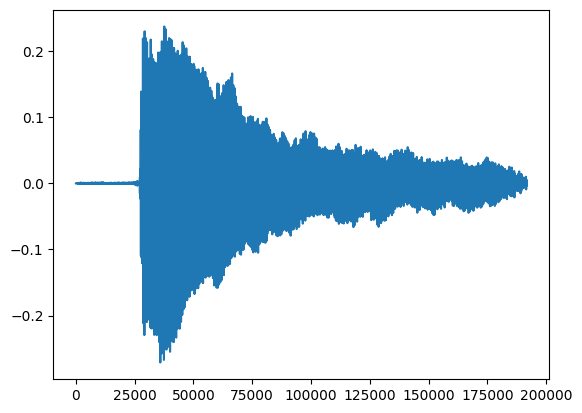

In [ ]:
tensor = tf.cast(audio_tensor, tf.float32) / 32768.0
plt.figure()
plt.plot(tensor.numpy()) 

tf.Tensor([28499 48515], shape=(2,), dtype=int64)
tf.Tensor(28499, shape=(), dtype=int64) tf.Tensor(48515, shape=(), dtype=int64)


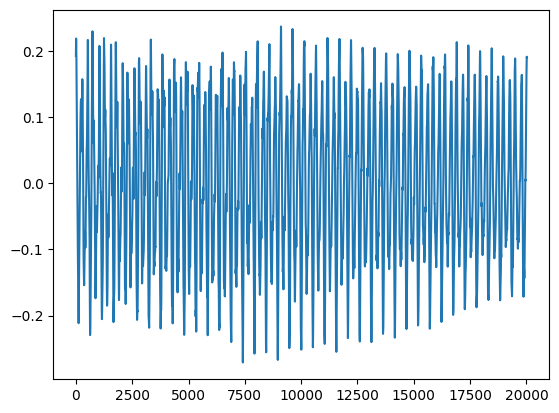

In [ ]:
position = tfio.audio.trim(tensor, axis=0, epsilon=0.19)
print(position)
start = position[0]
stop = position[1]
print(start, stop)
processed = tensor[start:stop]
plt.figure()
plt.plot(processed.numpy())
Audio(audio_tensor.numpy(), rate=audio.rate.numpy()) 

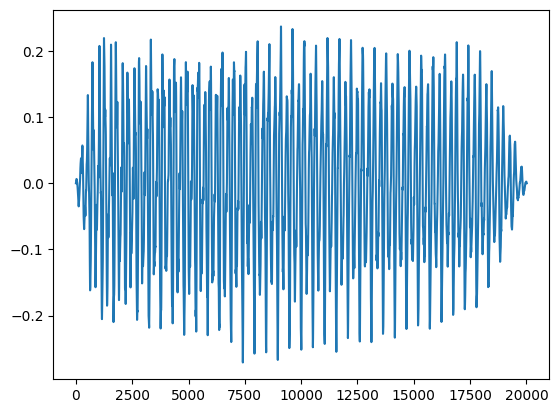

In [ ]:
fade = tfio.audio.fade(
     processed, fade_in=1000, fade_out=2000, mode="logarithmic")
plt.figure()
plt.plot(fade.numpy()) 

In [ ]:
Audio(audio_tensor.numpy(), rate=audio.rate.numpy()) 

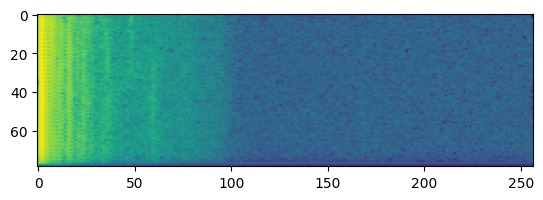

In [ ]:
spectrogram = tfio.audio.spectrogram(
    fade, nfft=512, window=512, stride=256)
plt.figure()
plt.imshow(tf.math.log(spectrogram).numpy())

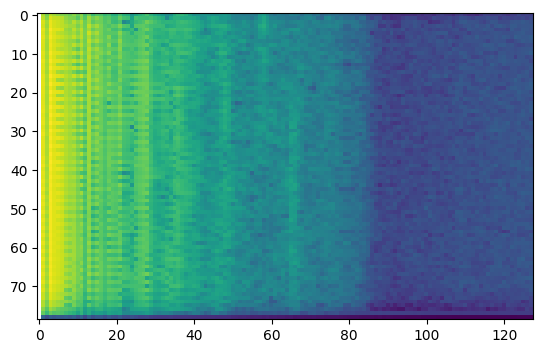

In [ ]:
# Convert to mel-spectrogram
mel_spectrogram = tfio.audio.melscale(
    spectrogram, rate=16000, mels=128, fmin=0, fmax=8000)
plt.figure()
plt.imshow(tf.math.log(mel_spectrogram).numpy())


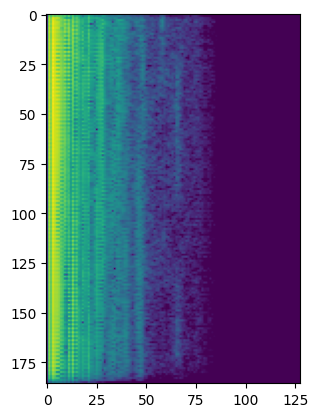

In [ ]:
# Convert to db scale mel-spectrogram
dbscale_mel_spectrogram = tfio.audio.dbscale(
    mel_spectrogram, top_db=80)
plt.figure()
plt.imshow(dbscale_mel_spectrogram.numpy())